In [1]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
data7=pd.read_csv('C:\\Users\\Rohith varma\\Downloads\\archive (7)\\IMDB-Movie-Data.csv')

In [3]:
#Check missing values in dataset 
data7.isnull().sum()

Rank                    0
Title                   0
Genre                   0
Description             0
Director                0
Actors                  0
Year                    0
Runtime (Minutes)       0
Rating                  0
Votes                   0
Revenue (Millions)    128
Metascore              64
dtype: int64

<AxesSubplot:>

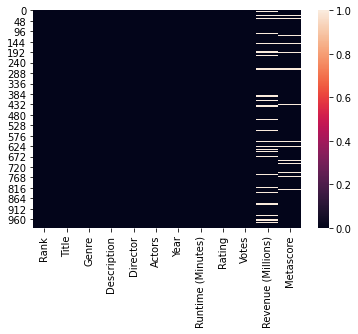

In [4]:
sns.heatmap(data7.isnull())

In [5]:
# % of missing values 
missing_values=data7.isnull().sum()*100/len(data7)

In [6]:
missing_values

Rank                   0.0
Title                  0.0
Genre                  0.0
Description            0.0
Director               0.0
Actors                 0.0
Year                   0.0
Runtime (Minutes)      0.0
Rating                 0.0
Votes                  0.0
Revenue (Millions)    12.8
Metascore              6.4
dtype: float64

In [7]:
#Drop the missing values 
data7.dropna(axis=0,inplace=True)

In [8]:
data7.isnull().sum()

Rank                  0
Title                 0
Genre                 0
Description           0
Director              0
Actors                0
Year                  0
Runtime (Minutes)     0
Rating                0
Votes                 0
Revenue (Millions)    0
Metascore             0
dtype: int64

In [9]:
data7.duplicated().any()

False

In [10]:
#display title of movie having runtime >= 180 minutes 

In [11]:
data7[data7['Runtime (Minutes)']>= 180]['Title']

82     The Wolf of Wall Street
88           The Hateful Eight
311             La vie d'Adèle
Name: Title, dtype: object

In [12]:
#in which year there was the highest average voting 
data7.groupby('Year')['Votes'].mean().sort_values(ascending=False)

Year
2012    290861.483871
2006    277232.219512
2009    267180.577778
2008    266580.145833
2007    266530.704545
2010    261082.929825
2011    259254.736842
2013    225531.892857
2014    211926.881720
2015    129512.651376
2016     68437.823232
Name: Votes, dtype: float64

<AxesSubplot:xlabel='Year', ylabel='Votes'>

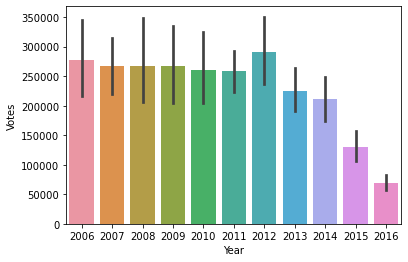

In [13]:
sns.barplot(x='Year',y='Votes',data=data7)

In [14]:
#In which year there was the highest average revenue 
data7.groupby('Year')['Revenue (Millions)'].mean().sort_values(ascending=False)

Year
2009    115.742000
2012    110.103065
2010    105.081579
2008     97.525417
2011     93.703333
2007     93.074091
2013     88.084643
2006     87.255610
2014     85.433656
2015     80.725596
2016     55.566111
Name: Revenue (Millions), dtype: float64

Text(0.5, 1.0, 'Vots by revenue')

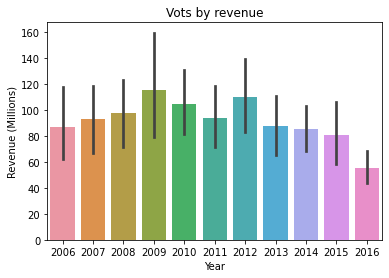

In [15]:
sns.barplot(x='Year',y='Revenue (Millions)',data=data7) 
plt.title('Vots by revenue')

In [16]:
#find average rating for each director  
data7.columns



Index(['Rank', 'Title', 'Genre', 'Description', 'Director', 'Actors', 'Year',
       'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)',
       'Metascore'],
      dtype='object')

In [17]:
data7.groupby('Director')['Rating'].mean()

Director
Aamir Khan             8.50
Abdellatif Kechiche    7.80
Adam McKay             7.00
Adam Shankman          6.30
Adam Wingard           5.90
                       ... 
Xavier Dolan           8.10
Yimou Zhang            6.10
Yorgos Lanthimos       7.20
Zack Snyder            7.04
Zackary Adler          5.10
Name: Rating, Length: 524, dtype: float64

In [18]:
#display top 10 length movies title and runtime 
#nlargest displays nlarge from the column 
top10_len=data7.nlargest(10,'Runtime (Minutes)')[['Title','Runtime (Minutes)']] .set_index('Title')

In [19]:
top10_len

,Runtime (Minutes)
Title,
The Hateful Eight,187
The Wolf of Wall Street,180
La vie d'Adèle,180
Cloud Atlas,172
3 Idiots,170
Interstellar,169
Pirates of the Caribbean: At World's End,169
The Hobbit: An Unexpected Journey,169
The Curious Case of Benjamin Button,166


<AxesSubplot:xlabel='Runtime (Minutes)', ylabel='Title'>

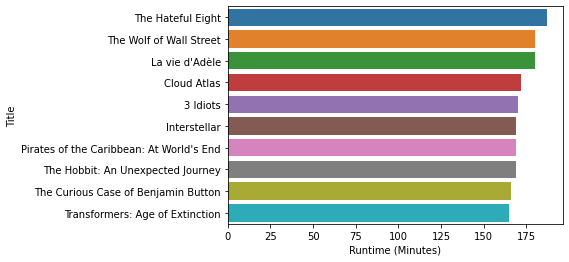

In [20]:
sns.barplot(x='Runtime (Minutes)',y=top10_len.index,data=top10_len)

In [21]:
#display no of movies per year 
data7.columns

Index(['Rank', 'Title', 'Genre', 'Description', 'Director', 'Actors', 'Year',
       'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)',
       'Metascore'],
      dtype='object')

In [22]:
data7['Year'].value_counts()

2016    198
2015    109
2014     93
2013     84
2012     62
2011     57
2010     57
2008     48
2009     45
2007     44
2006     41
Name: Year, dtype: int64

Text(0.5, 1.0, 'No of movies per year')

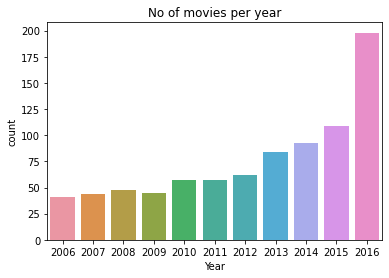

In [23]:
sns.countplot(x='Year',data=data7) 
plt.title('No of movies per year')

In [24]:
#find most popular movie title (highest revenue) 
data7.columns

Index(['Rank', 'Title', 'Genre', 'Description', 'Director', 'Actors', 'Year',
       'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)',
       'Metascore'],
      dtype='object')

In [25]:
data7[data7['Revenue (Millions)'].max()==data7['Revenue (Millions)']]['Title']

50    Star Wars: Episode VII - The Force Awakens
Name: Title, dtype: object

In [26]:
#Display top 10 Highest Rated Movie titles and its directors
top10_len=data7.nlargest(10,'Rating')[['Title','Rating','Director']].set_index('Title')


In [27]:
top10_len

,Rating,Director
Title,,
The Dark Knight,9.0,Christopher Nolan
Inception,8.8,Christopher Nolan
Interstellar,8.6,Christopher Nolan
Kimi no na wa,8.6,Makoto Shinkai
The Intouchables,8.6,Olivier Nakache
The Prestige,8.5,Christopher Nolan
The Departed,8.5,Martin Scorsese
The Dark Knight Rises,8.5,Christopher Nolan
Whiplash,8.5,Damien Chazelle


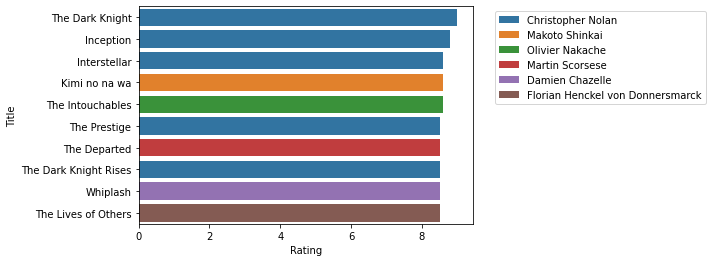

In [28]:
sns.barplot(x='Rating',y=top10_len.index,data=top10_len,hue="Director"
           ,dodge=False) 
plt.legend(bbox_to_anchor=(1.05,1),loc=2)

In [29]:
#Display top 10 Highest Revenue Movie Titles 
top_10=data7.nlargest(10,'Revenue (Millions)')[['Title','Revenue (Millions)']].\
set_index('Title')

In [30]:
top_10

,Revenue (Millions)
Title,
Star Wars: Episode VII - The Force Awakens,936.63
Avatar,760.51
Jurassic World,652.18
The Avengers,623.28
The Dark Knight,533.32
Rogue One,532.17
Finding Dory,486.29
Avengers: Age of Ultron,458.99
The Dark Knight Rises,448.13


Text(0.5, 1.0, 'Top 10 Highest Revenue movie titles')

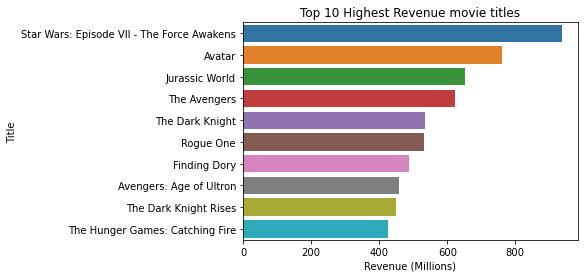

In [31]:
sns.barplot(x='Revenue (Millions)',y=top_10.index,data=top_10) 
plt.title("Top 10 Highest Revenue movie titles")

In [32]:
#find avg rating of movies (yearwise) 
data7.groupby('Year')['Rating'].mean().sort_values(ascending=False)

Year
2006    7.143902
2007    7.140909
2011    6.945614
2012    6.933871
2009    6.911111
2010    6.894737
2013    6.832143
2014    6.822581
2008    6.708333
2015    6.674312
2016    6.644444
Name: Rating, dtype: float64

<AxesSubplot:xlabel='Rating', ylabel='Revenue (Millions)'>

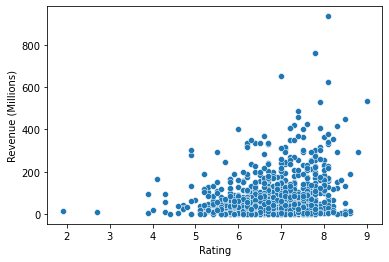

In [33]:
#does Rating effect the revenue 
sns.scatterplot(x='Rating',y='Revenue (Millions)',data=data7)

In [34]:
#classify movies based on ratings 
#we create a function for it

In [35]:
def rating(rate):
    if rate>=7.0:
        return 'Excellent' 
    elif rate>=6.0:
        return 'Good' 
    else:
        return 'Average'

In [36]:
data7['Rating_category']=data7['Rating'].apply(rating)

In [37]:
data7.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore,Rating_category
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0,Excellent
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0,Excellent
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0,Excellent
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0,Excellent
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0,Good


In [38]:
#count no of action movies 
len(data7[data7['Genre'].str.contains('Action',case=False)])

277

In [39]:
#find unique values from Genre 
list1=[] 
for value in data7['Genre']: 
    list1.append(value.split(','))

In [40]:
list1

[['Action', 'Adventure', 'Sci-Fi'],
 ['Adventure', 'Mystery', 'Sci-Fi'],
 ['Horror', 'Thriller'],
 ['Animation', 'Comedy', 'Family'],
 ['Action', 'Adventure', 'Fantasy'],
 ['Action', 'Adventure', 'Fantasy'],
 ['Comedy', 'Drama', 'Music'],
 ['Action', 'Adventure', 'Biography'],
 ['Adventure', 'Drama', 'Romance'],
 ['Adventure', 'Family', 'Fantasy'],
 ['Biography', 'Drama', 'History'],
 ['Action', 'Adventure', 'Sci-Fi'],
 ['Animation', 'Adventure', 'Comedy'],
 ['Action', 'Comedy', 'Drama'],
 ['Animation', 'Adventure', 'Comedy'],
 ['Biography', 'Drama', 'History'],
 ['Action', 'Thriller'],
 ['Biography', 'Drama'],
 ['Drama', 'Mystery', 'Sci-Fi'],
 ['Adventure', 'Drama', 'Thriller'],
 ['Drama'],
 ['Animation', 'Adventure', 'Comedy'],
 ['Action', 'Adventure', 'Sci-Fi'],
 ['Comedy'],
 ['Action', 'Adventure', 'Drama'],
 ['Comedy'],
 ['Drama', 'Thriller'],
 ['Action', 'Adventure', 'Sci-Fi'],
 ['Action', 'Adventure', 'Comedy'],
 ['Action', 'Horror', 'Sci-Fi'],
 ['Action', 'Adventure', 'Sci-Fi']

In [41]:
#to convert 2D to 1D 
one_d=[] 
for item in list1:
    for item1 in item:
        one_d.append(item1)

In [42]:
uni_list=[] 
for item in one_d:
    if item not in uni_list:
        uni_list.append(item)

In [43]:
uni_list

['Action',
 'Adventure',
 'Sci-Fi',
 'Mystery',
 'Horror',
 'Thriller',
 'Animation',
 'Comedy',
 'Family',
 'Fantasy',
 'Drama',
 'Music',
 'Biography',
 'Romance',
 'History',
 'Western',
 'Crime',
 'War',
 'Musical',
 'Sport']

In [44]:
#how many films of each genre were made 
from collections import Counter 
Counter(one_d)

Counter({'Action': 277,
         'Adventure': 244,
         'Sci-Fi': 107,
         'Mystery': 86,
         'Horror': 87,
         'Thriller': 148,
         'Animation': 45,
         'Comedy': 250,
         'Family': 48,
         'Fantasy': 92,
         'Drama': 419,
         'Music': 15,
         'Biography': 67,
         'Romance': 120,
         'History': 25,
         'Western': 4,
         'Crime': 126,
         'War': 10,
         'Musical': 5,
         'Sport': 15})